# 自编码器
自编码器是执行图像压缩的网络架构，其中压缩和解压功能从数据本身学习而来。训练方式是最小化输入和输出的差异。自编码器的压缩效果一般不如JEPG、MP3等，但是在降维和去噪表现很好。

In [8]:
#导入模块
%matplotlib inline
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt


In [9]:
#加载mnist数据集
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data')
#手动下载


C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [10]:
img = mnist.train.images[0]
img.shape[0]


784

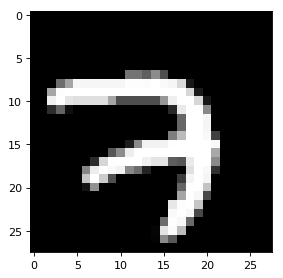

In [11]:
#打印图片
img = mnist.train.images[0]
plt.figure(figsize=(4,4),dpi=80)
plt.imshow(img.reshape(28,28),cmap='Greys_r')
plt.show()

In [12]:
#定义自编码器
##编码后的维度
encode_dim = 32
##inputs，targets and learn_rate
img_size = mnist.train.images.shape[1]
inputs = tf.placeholder(tf.float32, (None,img_size), name = 'inputs')
targets = tf.placeholder(tf.float32, (None,img_size), name = 'targets')
lr = tf.placeholder(tf.float32, name = 'learn_rate')
##encoder layer
encoder_layer = tf.layers.dense(inputs, encode_dim, activation=tf.nn.relu)
##decoder layer
logits = tf.layers.dense(encoder_layer, img_size, activation = None) # for compute cost
decoder_layer = tf.nn.sigmoid(logits, name = 'output')

##comput cost
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits = logits, labels = targets)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(lr).minimize(cost)

In [6]:
#define get batch function
def get_batch(inputs, batch_size):
    num = len(inputs) // batch_size
    new_inputs = inputs[:num * batch_size]
    #get batch
    input_batch = np.array(np.split(new_inputs, num, 0))
    return input_batch

In [7]:
test = np.arange(50)
batch_size = 5
num = len(test) // batch_size
new_inputs = test[:num * batch_size]
input_batch = np.array(np.split(new_inputs, num, 0))

In [8]:
test = np.arange(50)
a = get_batch(test, 5)
len(a)

10

In [9]:
#hyperparameter
batch_size = 200
learn_rate = 0.001
epochs = 20

In [10]:
#Train
sess = tf.Session()
sess.run(tf.global_variables_initializer())
batch = get_batch(mnist.train.images, batch_size)
for e in range(epochs):
    for i in range(batch.shape[0]):
        feed = {inputs: batch[i], targets: batch[i], lr: learn_rate}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
                  "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6949
Epoch: 1/20... Training loss: 0.6915
Epoch: 1/20... Training loss: 0.6883
Epoch: 1/20... Training loss: 0.6850
Epoch: 1/20... Training loss: 0.6805
Epoch: 1/20... Training loss: 0.6750
Epoch: 1/20... Training loss: 0.6679
Epoch: 1/20... Training loss: 0.6632
Epoch: 1/20... Training loss: 0.6574
Epoch: 1/20... Training loss: 0.6443
Epoch: 1/20... Training loss: 0.6357
Epoch: 1/20... Training loss: 0.6277
Epoch: 1/20... Training loss: 0.6128
Epoch: 1/20... Training loss: 0.5916
Epoch: 1/20... Training loss: 0.5689
Epoch: 1/20... Training loss: 0.5570
Epoch: 1/20... Training loss: 0.5338
Epoch: 1/20... Training loss: 0.5135
Epoch: 1/20... Training loss: 0.4911
Epoch: 1/20... Training loss: 0.4792
Epoch: 1/20... Training loss: 0.4685
Epoch: 1/20... Training loss: 0.4492
Epoch: 1/20... Training loss: 0.4281
Epoch: 1/20... Training loss: 0.4121
Epoch: 1/20... Training loss: 0.3957
Epoch: 1/20... Training loss: 0.3822
Epoch: 1/20... Training loss: 0.3993
E

Epoch: 1/20... Training loss: 0.2018
Epoch: 1/20... Training loss: 0.2134
Epoch: 1/20... Training loss: 0.2137
Epoch: 1/20... Training loss: 0.2107
Epoch: 1/20... Training loss: 0.2004
Epoch: 1/20... Training loss: 0.2040
Epoch: 1/20... Training loss: 0.2125
Epoch: 1/20... Training loss: 0.2155
Epoch: 1/20... Training loss: 0.2113
Epoch: 1/20... Training loss: 0.2051
Epoch: 1/20... Training loss: 0.2130
Epoch: 1/20... Training loss: 0.1923
Epoch: 1/20... Training loss: 0.2087
Epoch: 1/20... Training loss: 0.1953
Epoch: 1/20... Training loss: 0.2081
Epoch: 1/20... Training loss: 0.2040
Epoch: 1/20... Training loss: 0.2028
Epoch: 1/20... Training loss: 0.1977
Epoch: 1/20... Training loss: 0.2047
Epoch: 1/20... Training loss: 0.2111
Epoch: 1/20... Training loss: 0.2101
Epoch: 1/20... Training loss: 0.2000
Epoch: 1/20... Training loss: 0.2039
Epoch: 1/20... Training loss: 0.2009
Epoch: 1/20... Training loss: 0.2085
Epoch: 1/20... Training loss: 0.1997
Epoch: 1/20... Training loss: 0.1933
E

Epoch: 2/20... Training loss: 0.1790
Epoch: 2/20... Training loss: 0.1670
Epoch: 2/20... Training loss: 0.1714
Epoch: 2/20... Training loss: 0.1814
Epoch: 2/20... Training loss: 0.1693
Epoch: 2/20... Training loss: 0.1639
Epoch: 2/20... Training loss: 0.1721
Epoch: 2/20... Training loss: 0.1823
Epoch: 2/20... Training loss: 0.1771
Epoch: 2/20... Training loss: 0.1709
Epoch: 2/20... Training loss: 0.1717
Epoch: 2/20... Training loss: 0.1637
Epoch: 2/20... Training loss: 0.1774
Epoch: 2/20... Training loss: 0.1738
Epoch: 2/20... Training loss: 0.1781
Epoch: 2/20... Training loss: 0.1677
Epoch: 2/20... Training loss: 0.1567
Epoch: 2/20... Training loss: 0.1623
Epoch: 2/20... Training loss: 0.1685
Epoch: 2/20... Training loss: 0.1611
Epoch: 2/20... Training loss: 0.1667
Epoch: 2/20... Training loss: 0.1787
Epoch: 2/20... Training loss: 0.1751
Epoch: 2/20... Training loss: 0.1689
Epoch: 2/20... Training loss: 0.1662
Epoch: 2/20... Training loss: 0.1702
Epoch: 2/20... Training loss: 0.1669
E

Epoch: 3/20... Training loss: 0.1475
Epoch: 3/20... Training loss: 0.1565
Epoch: 3/20... Training loss: 0.1576
Epoch: 3/20... Training loss: 0.1443
Epoch: 3/20... Training loss: 0.1542
Epoch: 3/20... Training loss: 0.1515
Epoch: 3/20... Training loss: 0.1544
Epoch: 3/20... Training loss: 0.1623
Epoch: 3/20... Training loss: 0.1490
Epoch: 3/20... Training loss: 0.1512
Epoch: 3/20... Training loss: 0.1559
Epoch: 3/20... Training loss: 0.1579
Epoch: 3/20... Training loss: 0.1516
Epoch: 3/20... Training loss: 0.1439
Epoch: 3/20... Training loss: 0.1534
Epoch: 3/20... Training loss: 0.1518
Epoch: 3/20... Training loss: 0.1499
Epoch: 3/20... Training loss: 0.1433
Epoch: 3/20... Training loss: 0.1387
Epoch: 3/20... Training loss: 0.1456
Epoch: 3/20... Training loss: 0.1471
Epoch: 3/20... Training loss: 0.1505
Epoch: 3/20... Training loss: 0.1502
Epoch: 3/20... Training loss: 0.1449
Epoch: 3/20... Training loss: 0.1511
Epoch: 3/20... Training loss: 0.1489
Epoch: 3/20... Training loss: 0.1505
E

Epoch: 4/20... Training loss: 0.1441
Epoch: 4/20... Training loss: 0.1365
Epoch: 4/20... Training loss: 0.1361
Epoch: 4/20... Training loss: 0.1331
Epoch: 4/20... Training loss: 0.1543
Epoch: 4/20... Training loss: 0.1384
Epoch: 4/20... Training loss: 0.1391
Epoch: 4/20... Training loss: 0.1403
Epoch: 4/20... Training loss: 0.1367
Epoch: 4/20... Training loss: 0.1411
Epoch: 4/20... Training loss: 0.1317
Epoch: 4/20... Training loss: 0.1351
Epoch: 4/20... Training loss: 0.1445
Epoch: 4/20... Training loss: 0.1400
Epoch: 4/20... Training loss: 0.1236
Epoch: 4/20... Training loss: 0.1341
Epoch: 4/20... Training loss: 0.1441
Epoch: 4/20... Training loss: 0.1315
Epoch: 4/20... Training loss: 0.1277
Epoch: 4/20... Training loss: 0.1362
Epoch: 4/20... Training loss: 0.1438
Epoch: 4/20... Training loss: 0.1276
Epoch: 4/20... Training loss: 0.1318
Epoch: 4/20... Training loss: 0.1382
Epoch: 4/20... Training loss: 0.1297
Epoch: 4/20... Training loss: 0.1293
Epoch: 4/20... Training loss: 0.1369
E

Epoch: 5/20... Training loss: 0.1217
Epoch: 5/20... Training loss: 0.1216
Epoch: 5/20... Training loss: 0.1303
Epoch: 5/20... Training loss: 0.1317
Epoch: 5/20... Training loss: 0.1343
Epoch: 5/20... Training loss: 0.1328
Epoch: 5/20... Training loss: 0.1305
Epoch: 5/20... Training loss: 0.1324
Epoch: 5/20... Training loss: 0.1246
Epoch: 5/20... Training loss: 0.1297
Epoch: 5/20... Training loss: 0.1335
Epoch: 5/20... Training loss: 0.1357
Epoch: 5/20... Training loss: 0.1325
Epoch: 5/20... Training loss: 0.1321
Epoch: 5/20... Training loss: 0.1412
Epoch: 5/20... Training loss: 0.1259
Epoch: 5/20... Training loss: 0.1282
Epoch: 5/20... Training loss: 0.1265
Epoch: 5/20... Training loss: 0.1269
Epoch: 5/20... Training loss: 0.1345
Epoch: 5/20... Training loss: 0.1281
Epoch: 5/20... Training loss: 0.1271
Epoch: 5/20... Training loss: 0.1210
Epoch: 5/20... Training loss: 0.1211
Epoch: 5/20... Training loss: 0.1283
Epoch: 5/20... Training loss: 0.1314
Epoch: 5/20... Training loss: 0.1305
E

Epoch: 5/20... Training loss: 0.1207
Epoch: 5/20... Training loss: 0.1179
Epoch: 5/20... Training loss: 0.1142
Epoch: 5/20... Training loss: 0.1240
Epoch: 5/20... Training loss: 0.1149
Epoch: 5/20... Training loss: 0.1448
Epoch: 5/20... Training loss: 0.1406
Epoch: 5/20... Training loss: 0.1169
Epoch: 5/20... Training loss: 0.1184
Epoch: 6/20... Training loss: 0.1220
Epoch: 6/20... Training loss: 0.1215
Epoch: 6/20... Training loss: 0.1174
Epoch: 6/20... Training loss: 0.1197
Epoch: 6/20... Training loss: 0.1196
Epoch: 6/20... Training loss: 0.1203
Epoch: 6/20... Training loss: 0.1137
Epoch: 6/20... Training loss: 0.1184
Epoch: 6/20... Training loss: 0.1243
Epoch: 6/20... Training loss: 0.1279
Epoch: 6/20... Training loss: 0.1219
Epoch: 6/20... Training loss: 0.1355
Epoch: 6/20... Training loss: 0.1208
Epoch: 6/20... Training loss: 0.1215
Epoch: 6/20... Training loss: 0.1232
Epoch: 6/20... Training loss: 0.1217
Epoch: 6/20... Training loss: 0.1212
Epoch: 6/20... Training loss: 0.1313
E

Epoch: 6/20... Training loss: 0.1174
Epoch: 6/20... Training loss: 0.1162
Epoch: 6/20... Training loss: 0.1152
Epoch: 6/20... Training loss: 0.1275
Epoch: 6/20... Training loss: 0.1208
Epoch: 6/20... Training loss: 0.1267
Epoch: 6/20... Training loss: 0.1208
Epoch: 6/20... Training loss: 0.1198
Epoch: 6/20... Training loss: 0.1109
Epoch: 6/20... Training loss: 0.1174
Epoch: 6/20... Training loss: 0.1189
Epoch: 6/20... Training loss: 0.1193
Epoch: 6/20... Training loss: 0.1144
Epoch: 6/20... Training loss: 0.1146
Epoch: 6/20... Training loss: 0.1163
Epoch: 6/20... Training loss: 0.1160
Epoch: 6/20... Training loss: 0.1172
Epoch: 6/20... Training loss: 0.1161
Epoch: 6/20... Training loss: 0.1208
Epoch: 6/20... Training loss: 0.1090
Epoch: 6/20... Training loss: 0.1137
Epoch: 6/20... Training loss: 0.1110
Epoch: 6/20... Training loss: 0.1164
Epoch: 6/20... Training loss: 0.1147
Epoch: 6/20... Training loss: 0.1129
Epoch: 6/20... Training loss: 0.1134
Epoch: 6/20... Training loss: 0.1175
E

Epoch: 7/20... Training loss: 0.1160
Epoch: 7/20... Training loss: 0.1115
Epoch: 7/20... Training loss: 0.1079
Epoch: 7/20... Training loss: 0.1129
Epoch: 7/20... Training loss: 0.1227
Epoch: 7/20... Training loss: 0.1138
Epoch: 7/20... Training loss: 0.1137
Epoch: 7/20... Training loss: 0.1106
Epoch: 7/20... Training loss: 0.1044
Epoch: 7/20... Training loss: 0.1143
Epoch: 7/20... Training loss: 0.1130
Epoch: 7/20... Training loss: 0.1143
Epoch: 7/20... Training loss: 0.1109
Epoch: 7/20... Training loss: 0.1035
Epoch: 7/20... Training loss: 0.1062
Epoch: 7/20... Training loss: 0.1132
Epoch: 7/20... Training loss: 0.1054
Epoch: 7/20... Training loss: 0.1130
Epoch: 7/20... Training loss: 0.1209
Epoch: 7/20... Training loss: 0.1142
Epoch: 7/20... Training loss: 0.1095
Epoch: 7/20... Training loss: 0.1106
Epoch: 7/20... Training loss: 0.1134
Epoch: 7/20... Training loss: 0.1089
Epoch: 7/20... Training loss: 0.1121
Epoch: 7/20... Training loss: 0.1160
Epoch: 7/20... Training loss: 0.1146
E

Epoch: 8/20... Training loss: 0.1105
Epoch: 8/20... Training loss: 0.1053
Epoch: 8/20... Training loss: 0.1108
Epoch: 8/20... Training loss: 0.1127
Epoch: 8/20... Training loss: 0.1050
Epoch: 8/20... Training loss: 0.1107
Epoch: 8/20... Training loss: 0.1088
Epoch: 8/20... Training loss: 0.1118
Epoch: 8/20... Training loss: 0.1170
Epoch: 8/20... Training loss: 0.1088
Epoch: 8/20... Training loss: 0.1124
Epoch: 8/20... Training loss: 0.1130
Epoch: 8/20... Training loss: 0.1114
Epoch: 8/20... Training loss: 0.1116
Epoch: 8/20... Training loss: 0.1063
Epoch: 8/20... Training loss: 0.1050
Epoch: 8/20... Training loss: 0.1120
Epoch: 8/20... Training loss: 0.1131
Epoch: 8/20... Training loss: 0.1053
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.1076
Epoch: 8/20... Training loss: 0.1060
Epoch: 8/20... Training loss: 0.1072
Epoch: 8/20... Training loss: 0.1102
Epoch: 8/20... Training loss: 0.1054
Epoch: 8/20... Training loss: 0.1101
Epoch: 8/20... Training loss: 0.1056
E

Epoch: 9/20... Training loss: 0.1095
Epoch: 9/20... Training loss: 0.1083
Epoch: 9/20... Training loss: 0.1066
Epoch: 9/20... Training loss: 0.1018
Epoch: 9/20... Training loss: 0.0989
Epoch: 9/20... Training loss: 0.1053
Epoch: 9/20... Training loss: 0.1049
Epoch: 9/20... Training loss: 0.1096
Epoch: 9/20... Training loss: 0.1041
Epoch: 9/20... Training loss: 0.1050
Epoch: 9/20... Training loss: 0.1052
Epoch: 9/20... Training loss: 0.1177
Epoch: 9/20... Training loss: 0.1076
Epoch: 9/20... Training loss: 0.1058
Epoch: 9/20... Training loss: 0.1063
Epoch: 9/20... Training loss: 0.1049
Epoch: 9/20... Training loss: 0.1056
Epoch: 9/20... Training loss: 0.1006
Epoch: 9/20... Training loss: 0.1059
Epoch: 9/20... Training loss: 0.1152
Epoch: 9/20... Training loss: 0.1097
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.1020
Epoch: 9/20... Training loss: 0.1109
Epoch: 9/20... Training loss: 0.1019
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.1057
E

Epoch: 10/20... Training loss: 0.0991
Epoch: 10/20... Training loss: 0.1097
Epoch: 10/20... Training loss: 0.1011
Epoch: 10/20... Training loss: 0.1033
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0987
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0983
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.1040
Epoch: 10/20... Training loss: 0.1048
Epoch: 10/20... Training loss: 0.1087
Epoch: 10/20... Training loss: 0.1055
Epoch: 10/20... Training loss: 0.1020
Epoch: 10/20... Training loss: 0.1052
Epoch: 10/20... Training loss: 0.1012
Epoch: 10/20... Training loss: 0.1035
Epoch: 10/20... Training loss: 0.1072
Epoch: 10/20... Training loss: 0.1073
Epoch: 10/20... Training loss: 0.1050
Epoch: 10/20... Training loss: 0.1067
Epoch: 10/20... Training loss: 0.1120
Epoch: 10/20... Training loss: 0.0999
Epoch: 10/20... Training loss: 0.1037
Epoch: 10/20

Epoch: 10/20... Training loss: 0.1001
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0988
Epoch: 10/20... Training loss: 0.0998
Epoch: 10/20... Training loss: 0.0991
Epoch: 10/20... Training loss: 0.1001
Epoch: 10/20... Training loss: 0.0992
Epoch: 10/20... Training loss: 0.1053
Epoch: 10/20... Training loss: 0.0992
Epoch: 10/20... Training loss: 0.0984
Epoch: 10/20... Training loss: 0.1007
Epoch: 10/20... Training loss: 0.1038
Epoch: 10/20... Training loss: 0.1034
Epoch: 10/20... Training loss: 0.1019
Epoch: 10/20... Training loss: 0.1049
Epoch: 10/20... Training loss: 0.1033
Epoch: 10/20... Training loss: 0.1035
Epoch: 10/20... Training loss: 0.0998
Epoch: 10/20... Training loss: 0.0982
Epoch: 10/20... Training loss: 0.1065
Epoch: 10/20... Training loss: 0.0993
Epoch: 10/20... Training loss: 0.1083
Epoch: 10/20... Training loss: 0.1047
Epoch: 10/20... Training loss: 0.0988
Epoch: 10/20... Training loss: 0.0994
Epoch: 11/20... Training loss: 0.1032
Epoch: 11/20

Epoch: 11/20... Training loss: 0.1021
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.1014
Epoch: 11/20... Training loss: 0.1084
Epoch: 11/20... Training loss: 0.1031
Epoch: 11/20... Training loss: 0.0992
Epoch: 11/20... Training loss: 0.1003
Epoch: 11/20... Training loss: 0.1024
Epoch: 11/20... Training loss: 0.0984
Epoch: 11/20... Training loss: 0.1014
Epoch: 11/20... Training loss: 0.1046
Epoch: 11/20... Training loss: 0.1026
Epoch: 11/20... Training loss: 0.1045
Epoch: 11/20... Training loss: 0.1026
Epoch: 11/20... Training loss: 0.1062
Epoch: 11/20... Training loss: 0.1023
Epoch: 11/20... Training loss: 0.1020
Epoch: 11/20... Training loss: 0.1006
Epoch: 11/20... Training loss: 0.0978
Epoch: 11/20... Training loss: 0.1010
Epoch: 11/20... Training loss: 0.1053
Epoch: 11/20... Training loss: 0.1051
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0995
Epoch: 11/20... Training loss: 0.1007
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0974
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.1011
Epoch: 12/20... Training loss: 0.1013
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0913
Epoch: 12/20... Training loss: 0.0985
Epoch: 12/20... Training loss: 0.0970
Epoch: 12/20... Training loss: 0.0974
Epoch: 12/20... Training loss: 0.1008
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0999
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0992
Epoch: 12/20... Training loss: 0.0979
Epoch: 12/20... Training loss: 0.1032
Epoch: 12/20... Training loss: 0.1029
Epoch: 12/20... Training loss: 0.0995
Epoch: 12/20... Training loss: 0.1022
Epoch: 12/20... Training loss: 0.0969
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0970
Epoch: 12/20... Training loss: 0.1069
Epoch: 12/20... Training loss: 0.1051
Epoch: 12/20... Training loss: 0.1006
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0964
Epoch: 13/20... Training loss: 0.0964
Epoch: 13/20... Training loss: 0.0964
Epoch: 13/20... Training loss: 0.0966
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0966
Epoch: 13/20... Training loss: 0.1040
Epoch: 13/20... Training loss: 0.1008
Epoch: 13/20... Training loss: 0.0895
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.1026
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0909
Epoch: 13/20... Training loss: 0.0984
Epoch: 13/20... Training loss: 0.0977
Epoch: 13/20... Training loss: 0.0891
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0991
Epoch: 13/20... Training loss: 0.0922
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0972
Epoch: 13/20... Training loss: 0.0986
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.1062
Epoch: 13/20... Training loss: 0.1016
Epoch: 13/20... Training loss: 0.0994
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0907
Epoch: 14/20... Training loss: 0.0980
Epoch: 14/20... Training loss: 0.0988
Epoch: 14/20... Training loss: 0.1024
Epoch: 14/20... Training loss: 0.0991
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0990
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20... Training loss: 0.0972
Epoch: 14/20... Training loss: 0.1008
Epoch: 14/20... Training loss: 0.0963
Epoch: 14/20... Training loss: 0.0977
Epoch: 14/20... Training loss: 0.0994
Epoch: 14/20... Training loss: 0.1034
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0969
Epoch: 14/20... Training loss: 0.0976
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20... Training loss: 0.1043
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0900
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0988
Epoch: 14/20... Training loss: 0.1005
Epoch: 14/20... Training loss: 0.0981
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0993
Epoch: 14/20... Training loss: 0.0983
Epoch: 14/20... Training loss: 0.0971
Epoch: 14/20... Training loss: 0.0996
Epoch: 14/20... Training loss: 0.0985
Epoch: 14/20... Training loss: 0.0993
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.1023
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.1000
Epoch: 14/20... Training loss: 0.0970
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0977
Epoch: 15/20... Training loss: 0.0988
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0887
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0978
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20

Epoch: 15/20... Training loss: 0.1002
Epoch: 15/20... Training loss: 0.1010
Epoch: 15/20... Training loss: 0.0906
Epoch: 15/20... Training loss: 0.0910
Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20... Training loss: 0.0959
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.1027
Epoch: 15/20... Training loss: 0.0971
Epoch: 15/20... Training loss: 0.1034
Epoch: 15/20... Training loss: 0.0999
Epoch: 15/20... Training loss: 0.0979
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0978
Epoch: 15/20... Training loss: 0.0982
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0903
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0985
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0994
Epoch: 15/20... Training loss: 0.0910
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20

Epoch: 16/20... Training loss: 0.1007
Epoch: 16/20... Training loss: 0.0968
Epoch: 16/20... Training loss: 0.0963
Epoch: 16/20... Training loss: 0.0981
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.1000
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0891
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0883
Epoch: 16/20... Training loss: 0.0961
Epoch: 16/20... Training loss: 0.1024
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0971
Epoch: 16/20... Training loss: 0.0964
Epoch: 16/20... Training loss: 0.0964
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0973
Epoch: 16/20... Training loss: 0.1035
Epoch: 16/20... Training loss: 0.0965
Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0879
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0965
Epoch: 16/20... Training loss: 0.0966
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0966
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0881
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0899
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0993
Epoch: 17/20... Training loss: 0.1048
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0884
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0974
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0970
Epoch: 17/20... Training loss: 0.0989
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0960
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0986
Epoch: 17/20... Training loss: 0.1019
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0965
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0989
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0987
Epoch: 18/20... Training loss: 0.0891
Epoch: 18/20... Training loss: 0.0854
Epoch: 18/20... Training loss: 0.0877
Epoch: 18/20... Training loss: 0.0957
Epoch: 18/20... Training loss: 0.0997
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0984
Epoch: 18/20... Training loss: 0.0898
Epoch: 18/20... Training loss: 0.0907
Epoch: 18/20... Training loss: 0.0982
Epoch: 18/20... Training loss: 0.0958
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0908
Epoch: 18/20... Training loss: 0.0901
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0988
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0898
Epoch: 18/20... Training loss: 0.1045
Epoch: 18/20... Training loss: 0.0965
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0884
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0893
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0960
Epoch: 19/20... Training loss: 0.0982
Epoch: 19/20... Training loss: 0.0980
Epoch: 19/20... Training loss: 0.0967
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0873
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0896
Epoch: 19/20... Training loss: 0.0906
Epoch: 19/20... Training loss: 0.0894
Epoch: 19/20... Training loss: 0.0893
Epoch: 19/20... Training loss: 0.0891
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0964
Epoch: 19/20... Training loss: 0.1001
Epoch: 19/20... Training loss: 0.0969
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0900
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0908
Epoch: 19/20... Training loss: 0.0964
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0984
Epoch: 19/20... Training loss: 0.0996
Epoch: 19/20... Training loss: 0.0979
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0910
Epoch: 19/20... Training loss: 0.0884
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0905
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0978
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0976
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0950
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0869
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0955
Epoch: 20/20... Training loss: 0.0960
Epoch: 20/20... Training loss: 0.0878
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0964
Epoch: 20/20... Training loss: 0.0898
Epoch: 20/20... Training loss: 0.0965
Epoch: 20/20... Training loss: 0.1031
Epoch: 20/20... Training loss: 0.0974
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0960
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0963
Epoch: 20/20... Training loss: 0.0993
Epoch: 20/20... Training loss: 0.0974
Epoch: 20/20... Training loss: 0.0993
Epoch: 20/20... Training loss: 0.0972
Epoch: 20/20... Training loss: 0.0997
Epoch: 20/20... Training loss: 0.0967
Epoch: 20/20... Training loss: 0.0969
Epoch: 20/20

In [11]:
#save model
saver = tf.train.Saver()
save_path = './save'
saver.save(sess, save_path)

'./save'

In [13]:
#load model and test
saver = tf.train.Saver()
save_path = './save'
sess = tf.Session()
saver.restore(sess,save_path)


INFO:tensorflow:Restoring parameters from ./save


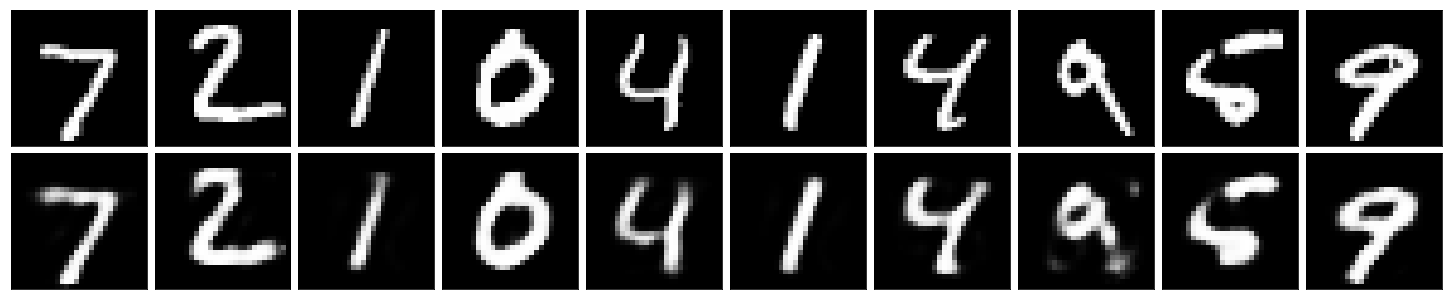

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoder_layer, encoder_layer], feed_dict={inputs: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)